In [1]:
# https://medium.com/towards-artificial-intelligence/predict-the-stock-trend-using-deep-learning-5a4b7df1d152
# https://github.com/mwitiderrick/stockprice

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [4]:
df = pd.read_csv('./data/NSE-TATAGLOBAL.csv')
df.shape
df = df[::-1]
df = df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
open_price = df.iloc[:,1:2]
train_set = open_price[:2000].values
test_set = open_price[2000:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2000, 1)
Test size: (35, 1)


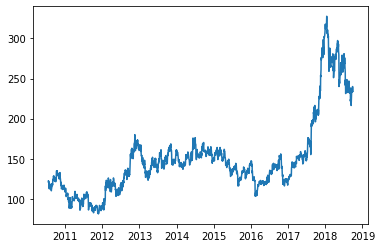

In [6]:
dates = pd.to_datetime(df['Date'])
plt.plot_date(dates, open_price,fmt='-')
plt.savefig("test1final.png")

In [7]:
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [8]:
x_train = []
y_train = []
for i in range(60,2000):
    x_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1940, 60, 1)

In [9]:
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=20, batch_size =1,verbose=2)

Epoch 1/20


KeyboardInterrupt: 

In [10]:
input = open_price[len(open_price)-len(test_set)-60:].values
input.shape
input = sc.transform(input)

In [11]:
x_test = []
for i in range(60,95):
    x_test.append(input[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(35, 60, 1)

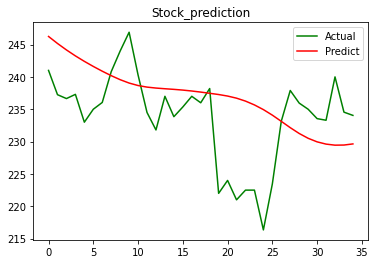

In [14]:
pred = reg.predict(x_test)
pred = sc.inverse_transform(pred)
plt.plot(test_set,color='green', label="Actual")
plt.plot(pred,color='red',label="Predict")
plt.title('Stock_prediction')
plt.legend()
plt.show()